In [1]:
import psycopg2, statistics
from collections import defaultdict
import collections
from datetime import timedelta
import matplotlib.mlab as mlab

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
conn = psycopg2.connect(database="delay", user="nikita")
conn.autocommit = True

In [3]:
cur = conn.cursor()
cur.execute("SELECT * FROM heading WHERE line='95' AND way=1 ORDER BY id;")
data = cur.fetchall()

stops_names = ['GRAND-PLACE', 'BIBLIOTHEQUE', 'GRAND SABLON', 'PETIT SABLON', 'ROYALE', 'TRONE', 'SCIENCE', 'LUXEMBOURG', 'IDALIE', 'BLYCKAERTS', 'GERMOIR', 'RODIN', 'DELPORTE', 'ETTERBEEK GARE', 'THYS', 'CIM. D\'IXELLES', 'RELAIS', 'ARCADES', 'KEYM', 'VANDER ELST', 'ORTOLANS', 'LES 3 TILLEULS', 'CERISAIE', 'FAUCONNERIE',]

In [4]:
for id, line, way, positions, date in data[:2000]:
    time = date.strftime("%H:%M:%S ")
    print(time + ''.join(['■' if has_bus else '□' for has_bus in positions]))

11:33:29 ■□□□■□□■■□□□□□■□□■□□□■□□
11:33:49 ■□□□■□□■■□□□□□■□□■□□□□■□
11:34:09 ■□□□■□□■■□□□□□□■□■□□□□■□
11:34:29 ■□□□■□□■■□□□□□□■□■□□□□□■
11:34:49 ■□□□□□□■■□□□□□□■□■□□□□□■
11:35:09 ■□□□□□□■□■□□□□□■□□■□□□□■
11:35:29 ■□□□□□□■□■□□□□□■□□■□□□□■
11:35:49 ■□□□□□□■□■□□□□□■□□■□□□□□
11:36:09 ■□□□□□□□■■□□□□□■□□■□□□□□
11:36:30 ■□□□□□□□■■□□□□□■□□■□□□□□
11:36:49 ■□□□□□□□■■□□□□□■□□■□□□□□
11:37:09 □■□□□□□□■□□□□□□□■□□■□□□□
11:37:29 □■□□□□□□□■■□□□□□■□□■□□□□
11:37:49 □□■□□□□□□■■□□□□□■□□■□□□□
11:38:09 □□■□□□□□□■□■□□□□□■□■□□□□
11:38:29 □□■□□□□□□■□■□□□□□■□□■□□□
11:38:49 □□■□□□□□□■□■□□□□□■□□■□□□
11:39:09 □□□■□□□□□□■■□□□□□■□□□■□□
11:39:29 □□□■□□□□□□■□■□□□□■□□□■□□
11:39:49 □□□■□□□□□□■□■□□□□□■□□■□□
11:40:09 □□□■□□□□□□■□■□□□□□■□□■□□
11:40:29 □□□■□□□□□□■□■□□□□□■□□□■□
11:40:49 □□□■□□□□□□■□■□□□□□■□□□■□
11:41:09 □□□■□□□□□□□■■□□□□□■□□□■□
11:41:29 □□□■□□□□□□□■■□□□□□□■□□□■
11:41:49 □□□■□□□□□□□■■□□□□□□■□□□■
11:42:09 □□□■□□□□□□□■□■□□□□□■□□□■
11:42:29 □□□□■□□□□□□□■■□□□□□□■□□■
11:42:49 □□□□■■□□□□□□■■□□□□□□■□□□
11:43:09 □□□□■

In [5]:
aligned = []
next_id = 0
for i, row in enumerate(data):
    id, line, way, positions, date = row
    new_row = []
    for j, stop in enumerate(positions):
        if stop:
            # first row
            if i == 0:
                id = next_id
                next_id += 1
            elif j-1 >= 0 and aligned[i-1][j-1] and aligned[i-1][j-1] not in new_row:
                id = aligned[i-1][j-1]
            elif aligned[i-1][j] and aligned[i-1][j] not in new_row:
                id = aligned[i-1][j]
            else:
                id = next_id
                next_id += 1
        else:
            id = False
        new_row.append(id)
    aligned.append(new_row)

In [6]:
for row in aligned[:2000]:
    print(''.join(['{:<3}'.format(id) if id else '□  ' for id in row]))

□  □  □  □  1  □  □  2  3  □  □  □  □  □  4  □  □  5  □  □  □  6  □  □  
7  □  □  □  1  □  □  2  3  □  □  □  □  □  4  □  □  5  □  □  □  □  6  □  
7  □  □  □  1  □  □  2  3  □  □  □  □  □  □  4  □  5  □  □  □  □  6  □  
7  □  □  □  1  □  □  2  3  □  □  □  □  □  □  4  □  5  □  □  □  □  □  6  
7  □  □  □  □  □  □  2  3  □  □  □  □  □  □  4  □  5  □  □  □  □  □  6  
7  □  □  □  □  □  □  2  □  3  □  □  □  □  □  4  □  □  5  □  □  □  □  6  
7  □  □  □  □  □  □  2  □  3  □  □  □  □  □  4  □  □  5  □  □  □  □  6  
7  □  □  □  □  □  □  2  □  3  □  □  □  □  □  4  □  □  5  □  □  □  □  □  
7  □  □  □  □  □  □  □  2  3  □  □  □  □  □  4  □  □  5  □  □  □  □  □  
7  □  □  □  □  □  □  □  2  3  □  □  □  □  □  4  □  □  5  □  □  □  □  □  
7  □  □  □  □  □  □  □  2  3  □  □  □  □  □  4  □  □  5  □  □  □  □  □  
□  7  □  □  □  □  □  □  2  □  □  □  □  □  □  □  4  □  □  5  □  □  □  □  
□  7  □  □  □  □  □  □  □  2  8  □  □  □  □  □  4  □  □  5  □  □  □  □  
□  □  7  □  □  □  □  □  □  2  8  □  □  □  □  □  4  

On parcourt la matrice alignée et on garde une liste des positions `(heure, n° d'arrêt)` pour chaque id de véhicule

In [7]:
# raw_trajects : dict of(bus_id : list of (time, stop n°) with duplicate stops)
raw_trajects = defaultdict(list)
for data_row, aligned_row in zip(data,aligned):
    _, _, _, _, date = data_row
    for i, stop in enumerate(aligned_row):
        if stop:
            raw_trajects[stop].append((date, i))

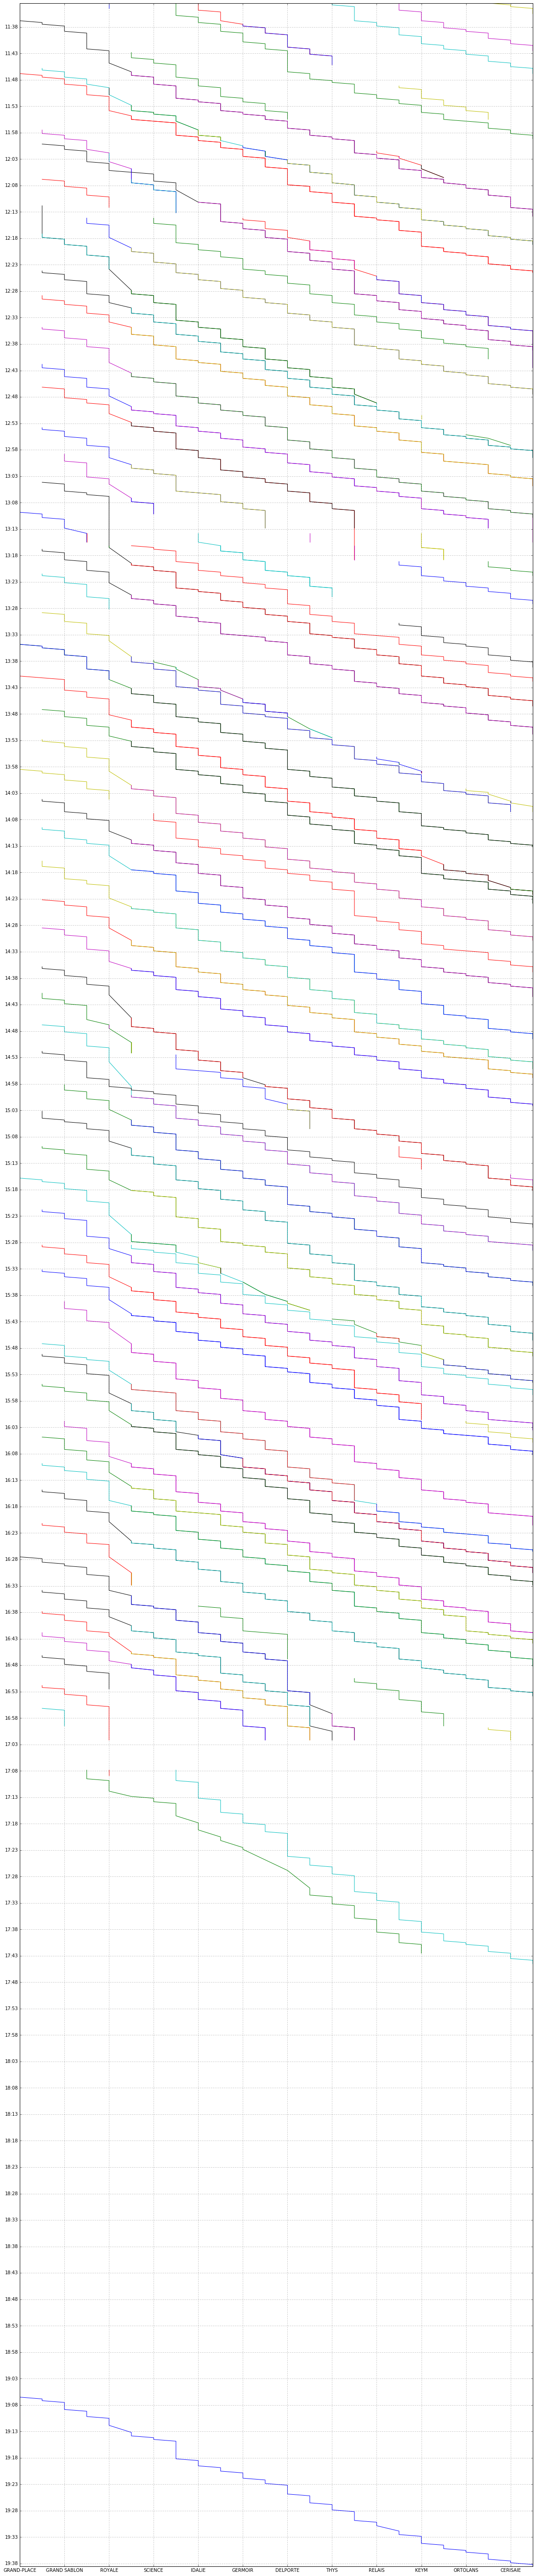

In [87]:
xf = defaultdict(str,enumerate(stops_names))

fig, ax = plt.subplots(figsize=(20,100))
ax.grid(True)
ax.invert_yaxis()

ax.yaxis.set_major_locator(MinuteLocator(interval=5))
ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))

ax.xaxis.set_major_formatter(FuncFormatter(lambda tick, pos: xf[int(tick)])) 
ax.xaxis.set_major_locator(IndexLocator(2, 0)) 


pylab.xlim([0,23])
plotable = sorted(raw_trajects.values(), key=lambda x: x[0][0])
for d in plotable[:200]:
    x=[a[0] for a in d]
    y=[a[1] for a in d]
    p = ax.plot(y,x)

On colle des trajets proches

In [9]:
def merge_trajects(trajects):
    trajects_with_id = list(enumerate(trajects))
    used_trajects_id = set()
    trajects_by_start_stop = defaultdict(list)
    for id, traject in trajects_with_id:
        start_time, start_stop = traject[0]
        trajects_by_start_stop[start_stop].append((id, traject))

    merged_trajects = []

    for id, traject in trajects_with_id:
        if id in used_trajects_id:
            continue
        used_trajects_id.add(id)

        end_time, end_stop = traject[-1]
        candidates = trajects_by_start_stop[end_stop] + trajects_by_start_stop[end_stop + 1]

        def is_acceptable(candidate_tuple):
            id, candidate = candidate_tuple
            candidate_start_time, candidate_start_stop  = candidate[0]
            if id in used_trajects_id:
                return False

            starts_after = candidate_start_time > end_time
            starts_not_too_late = candidate_start_time < end_time + timedelta(minutes=5)
            return starts_after and starts_not_too_late

        candidates = list(filter(is_acceptable, candidates))
        candidates = list(sorted(candidates, key=lambda x: x[0]))
        if len(candidates) > 0:
            best_fit = candidates[0]
            best_id, best_traject = best_fit
            used_trajects_id.add(best_id)
            traject += best_traject

        merged_trajects.append(traject)
    return merged_trajects

In [10]:
print(len(raw_trajects))
merged = merge_trajects(raw_trajects.values())
merged2 = merge_trajects(merged)
merged3 = merge_trajects(merged2)
print(len(merged))
print(len(merged2))
print(len(merged3))

26391
16314
13975
13358


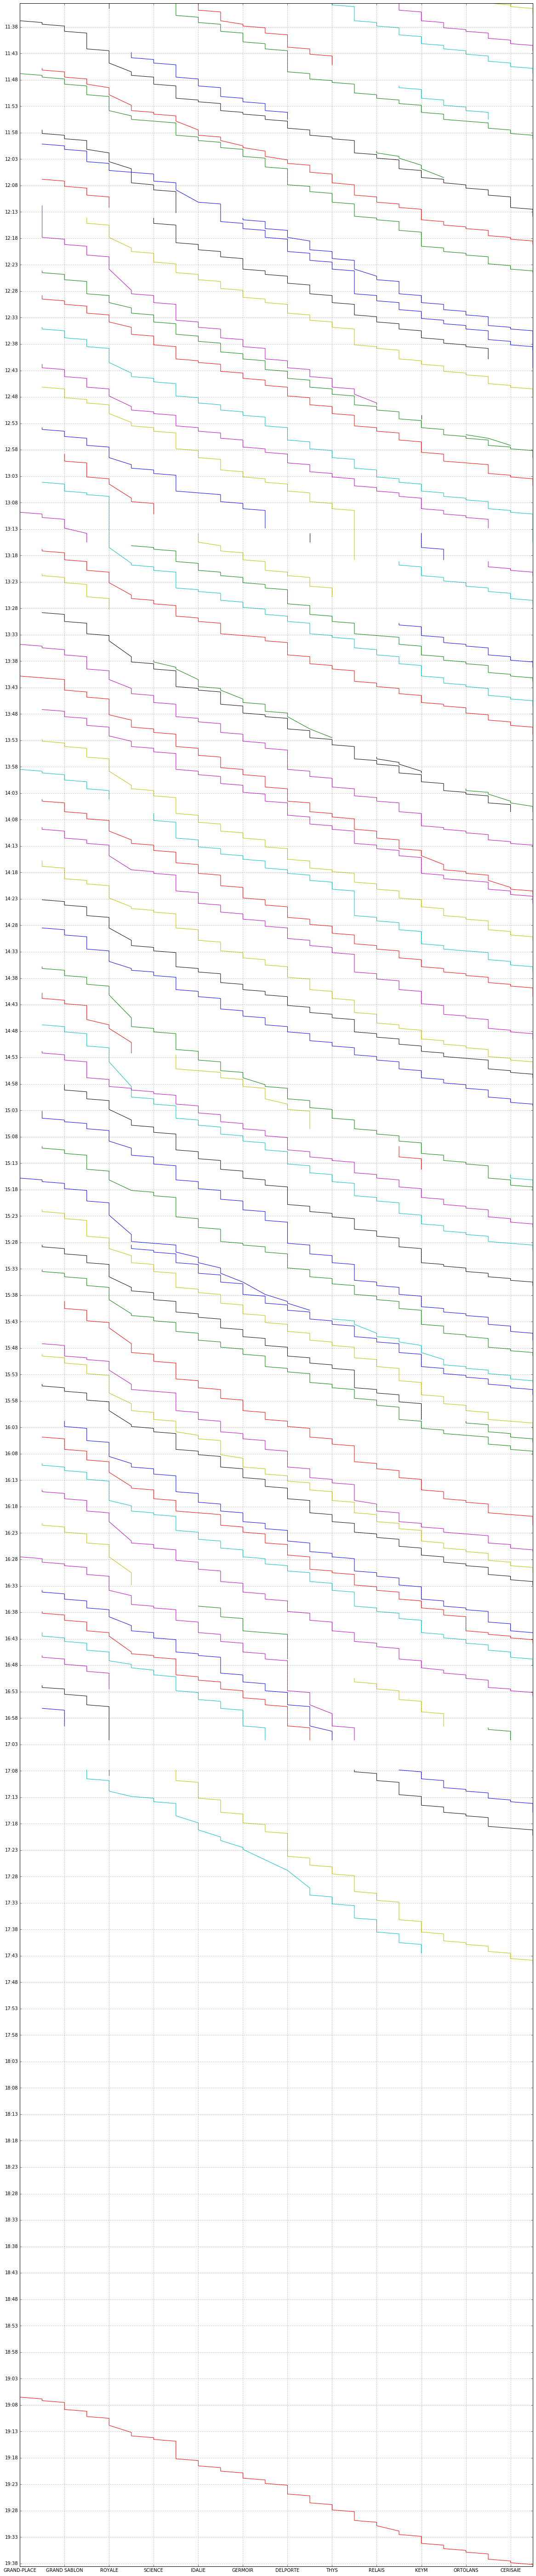

In [85]:
xf = defaultdict(str,enumerate(stops_names))

fig, ax = plt.subplots(figsize=(20,100))
ax.grid(True)
ax.invert_yaxis()

ax.yaxis.set_major_locator(MinuteLocator(interval=5))
ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))

ax.xaxis.set_major_formatter(FuncFormatter(lambda tick, pos: xf[int(tick)])) 
ax.xaxis.set_major_locator(IndexLocator(2, 0)) 


pylab.xlim([0,23])
plotable = sorted(merged3, key=lambda x: x[0][0])
for d in plotable[:100]:
    x=[a[0] for a in d]
    y=[a[1] for a in d]
    p = ax.plot(y,x)

Les bus passent parfois très longtemps au terminus avant de partir `skip_terminus` supprime toutes les occurences du terminus à l'avant de la liste des positions sauf la dernière

In [12]:
def skip_terminus(traject):
    index = -1
    for i, l in enumerate(traject):
        time, stop = l
        if stop == 0:
            index = i
        else:
            break
    last_terminus = index
    if last_terminus >= 0:
        return traject[last_terminus:]
    else:
        return traject

Chaque trajet contient consécutivement plusieurs fois le même arrêt. `reduce_traject` ne garde que la première occurence de chaque arrêt (qui est l'instant le plus proche du moment ou le bus est réellement arrivé à l'arrêt)

In [13]:
def reduce_traject(traject):
    seen_stops = set()
    ret = []
    for time, stop in traject:
        if stop not in seen_stops:
            ret.append([time, stop])
            seen_stops.add(stop)
    return ret

In [14]:
trajects = merged3
trajects = map(skip_terminus, trajects)
trajects = map(reduce_traject, trajects)
# Remove short (and thus bogus trajects)
trajects = filter(lambda x: len(x) > 4, trajects)

trajects = list(trajects)
len(trajects)

9886

In [15]:
traject_len = list(map(lambda x: len(x), trajects))
print("Mean length: %f \nMedian lenght: %s" % (statistics.mean(traject_len), statistics.median(traject_len)))

Mean length: 18.014161 
Median lenght: 21.0


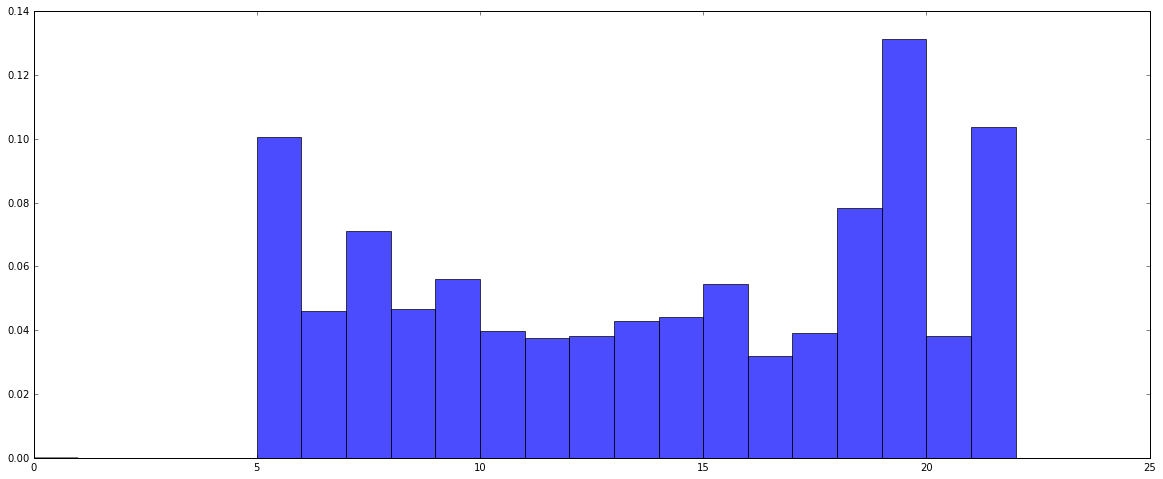

In [16]:
plt.hist(traject_len, bins=range(0,23), alpha=0.7, normed=True);

On calcule le temps qu'il faut aller d'un arrêt au suivant (arrondi à la seconde).
`time_per_stop` renvoie un dictionnaire qui associe à chaque n° arrêt le temps qu'il a fallu pour arriver au suivant

In [18]:
def time_per_stop(traject):
    ret = {}
    for start, stop in zip(traject[:-1], traject[1:]):
        start_time, start_stop = start
        stop_time, stop_stop = stop
        duration = (stop[0] - start[0]).total_seconds()
        duration = round(duration)
        
        ret[start_stop] = duration
    return ret

In [19]:
durations = list(map(time_per_stop, trajects))

In [20]:
travel_times = [[] for _ in range(23)]
for duration_dict in durations:
    for stop, duration in duration_dict.items():
        travel_times[stop].append(duration)

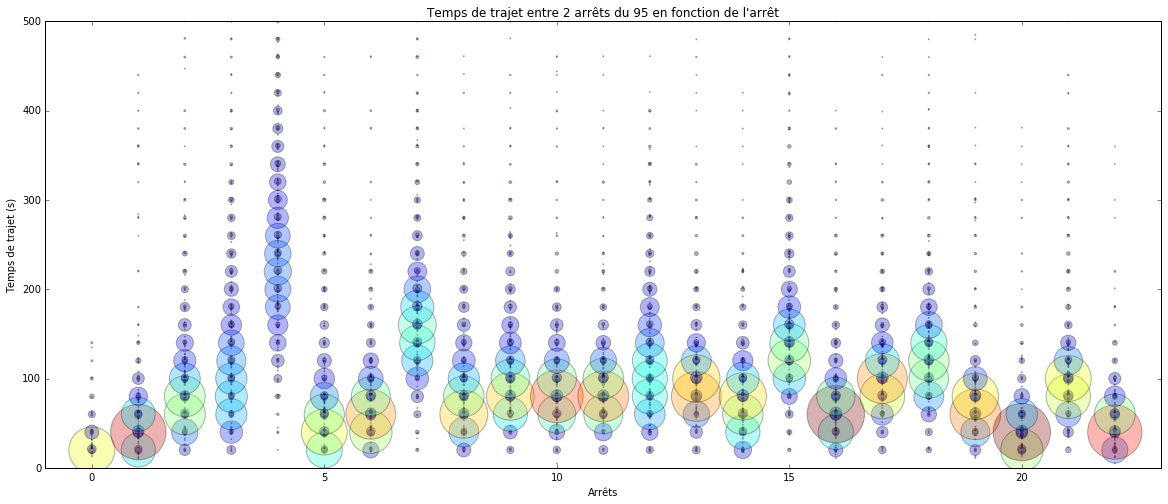

In [47]:
x, y, area, color = [], [], [], []
for stop, times in enumerate(travel_times):
    times = collections.Counter(times)
    for time, count in times.items():
        x.append(stop)
        y.append(time)
        area.append(count)
        color.append(count)

plt.scatter(x, y, s=area, c=color, alpha=0.3)
pylab.ylim([0,500])
pylab.xlim([-1,23])
plt.title("Temps de trajet entre 2 arrêts du 95 en fonction de l'arrêt")
plt.xlabel('Arrêts')
plt.ylabel('Temps de trajet (s)');

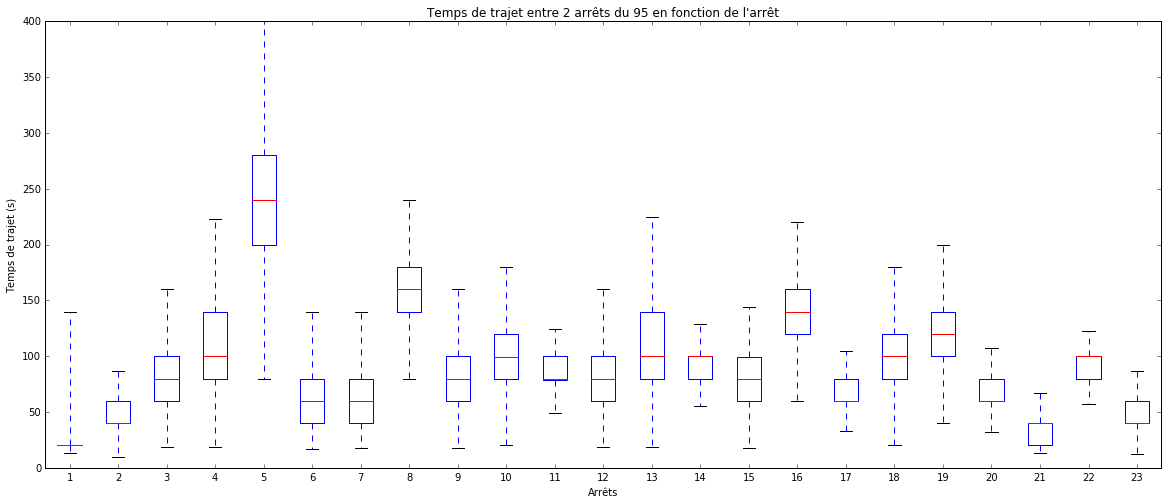

In [49]:
plt.boxplot(travel_times, showfliers=False)
plt.title("Temps de trajet entre 2 arrêts du 95 en fonction de l'arrêt")
plt.xlabel('Arrêts')
plt.ylabel('Temps de trajet (s)');

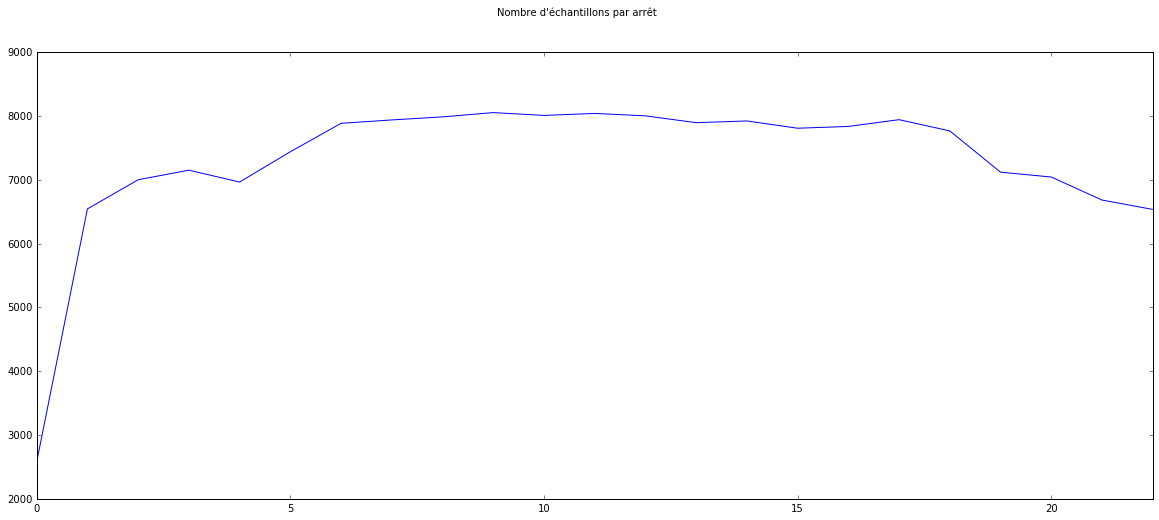

In [52]:
plt.plot(range(len(travel_times)), [len(x) for x in travel_times])
pylab.xlim([0,22]);
plt.suptitle("Nombre d'échantillons par arrêt");

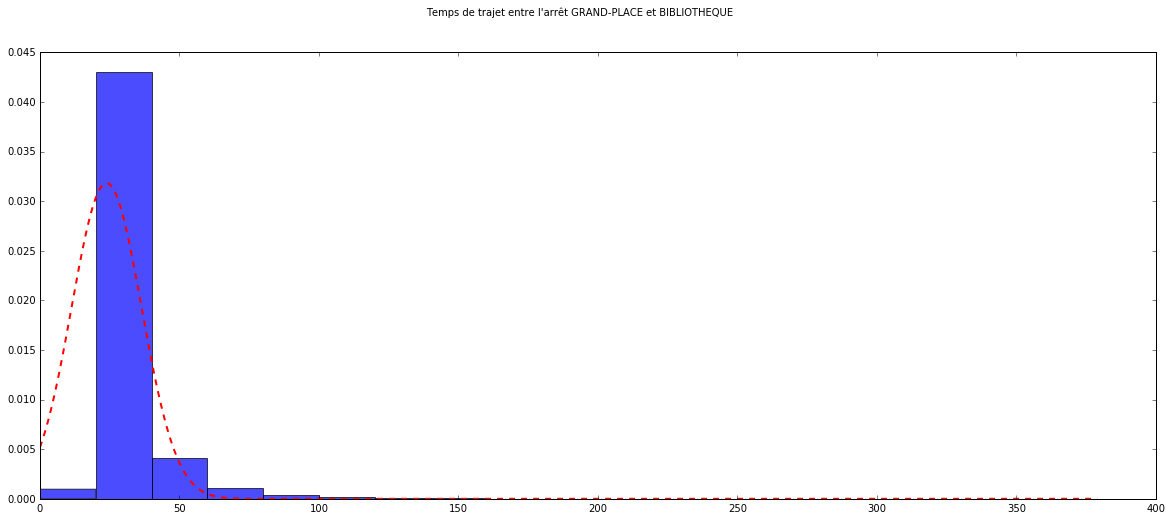

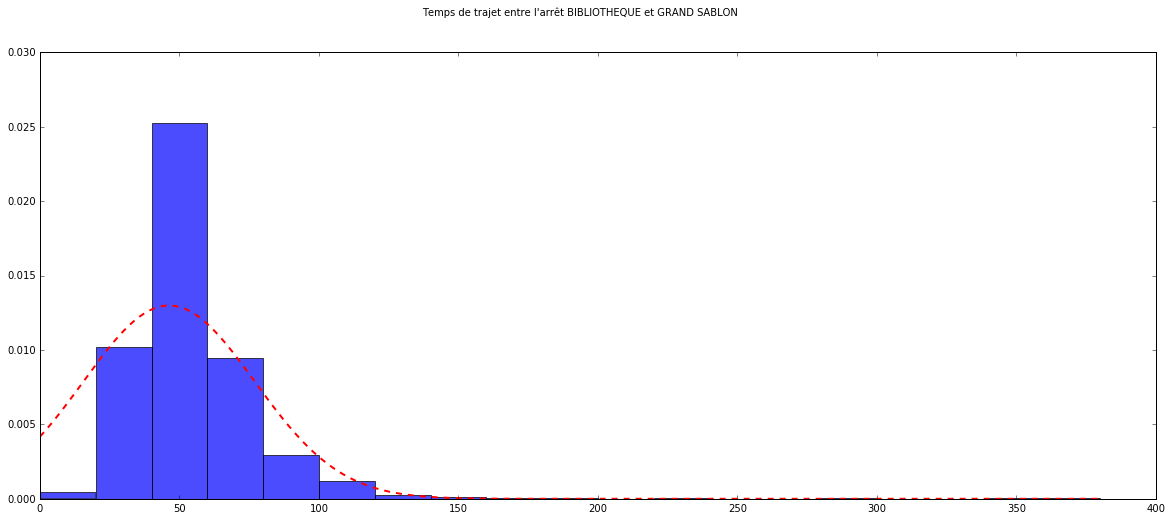

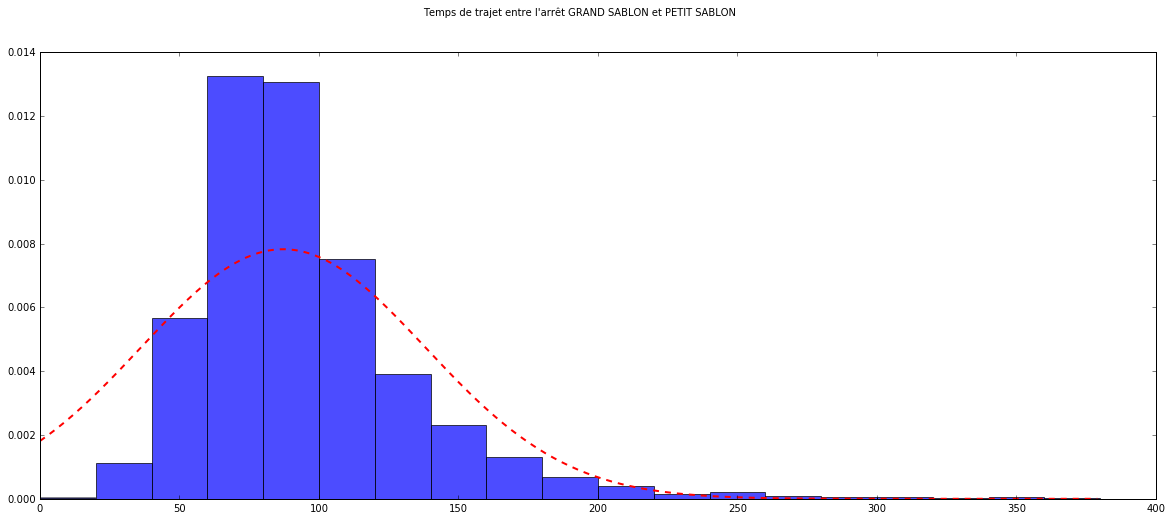

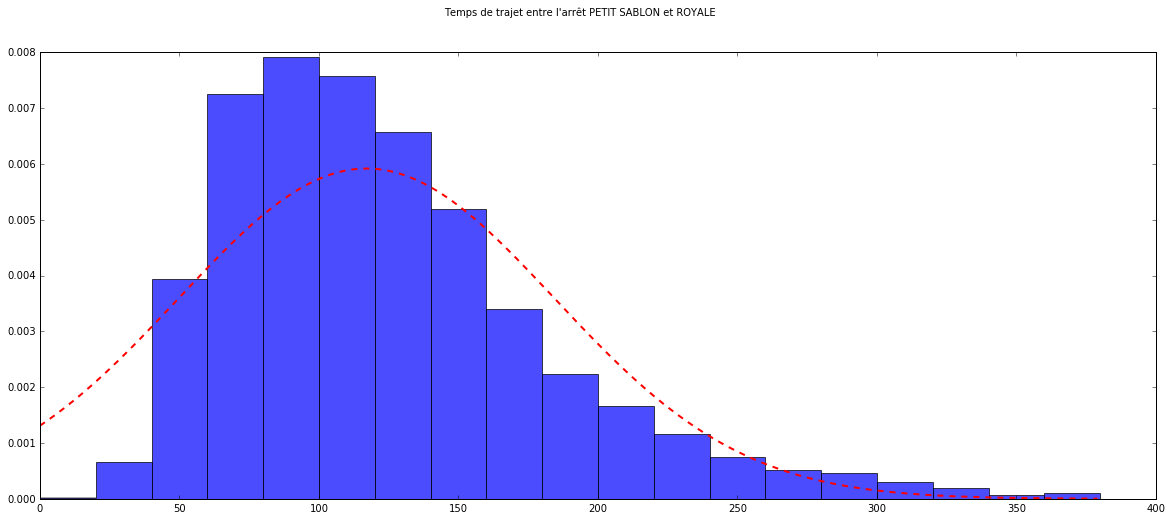

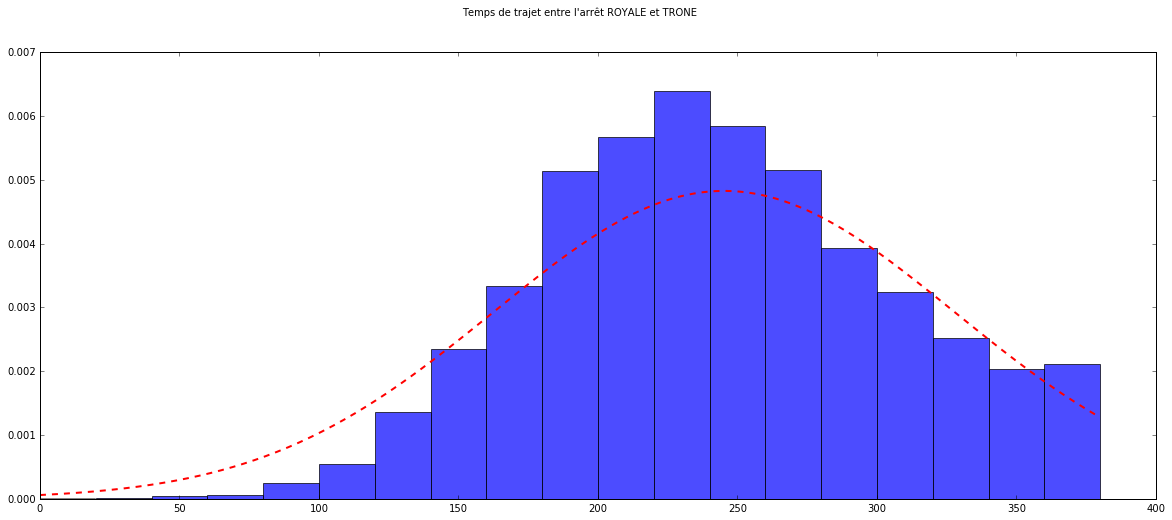

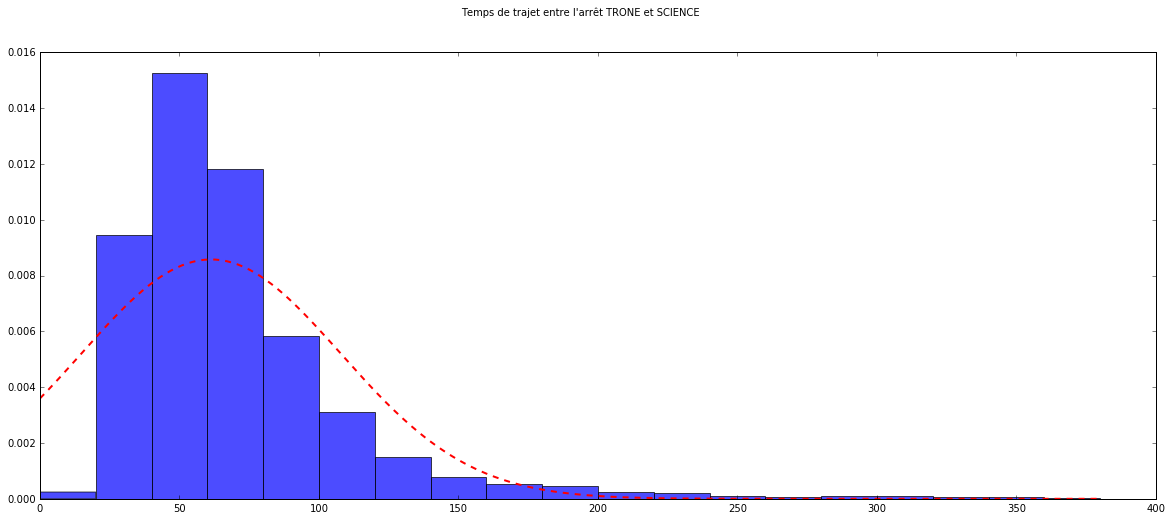

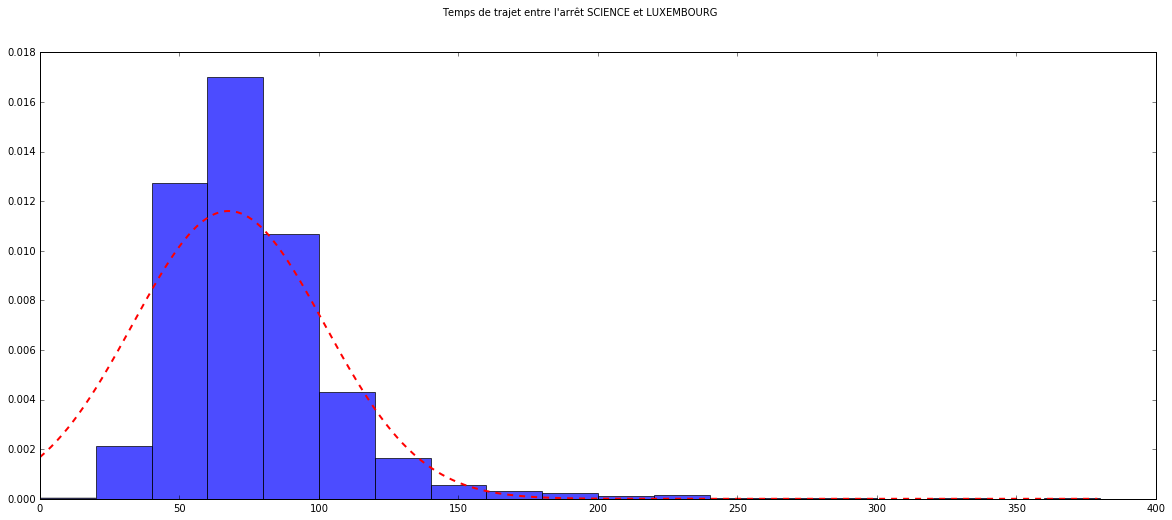

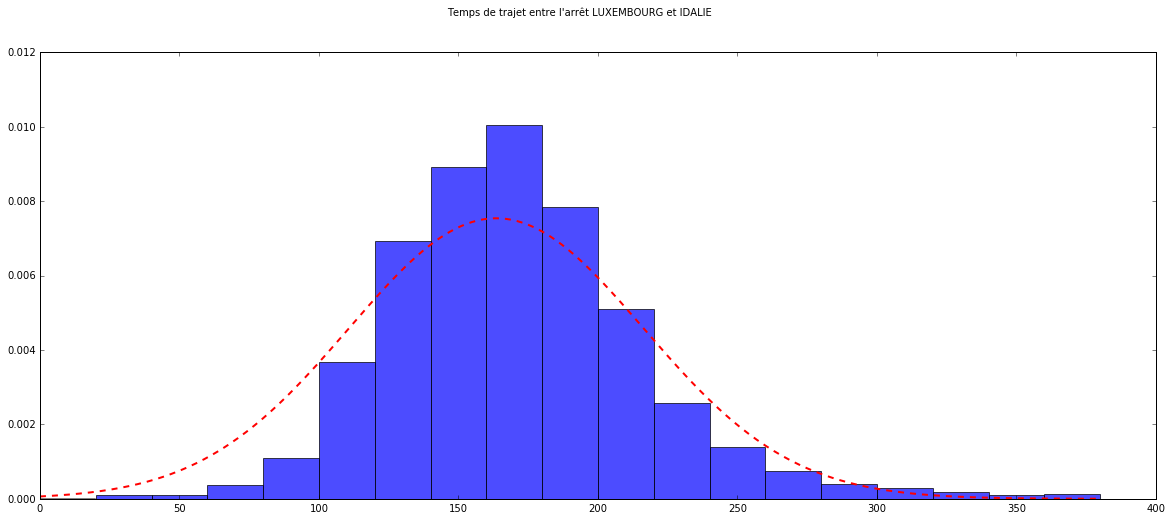

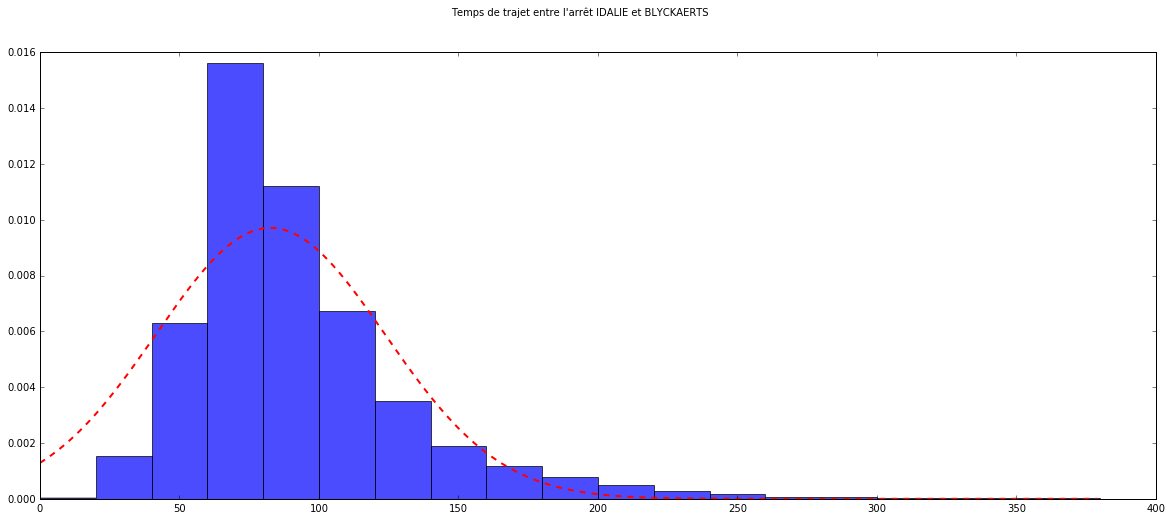

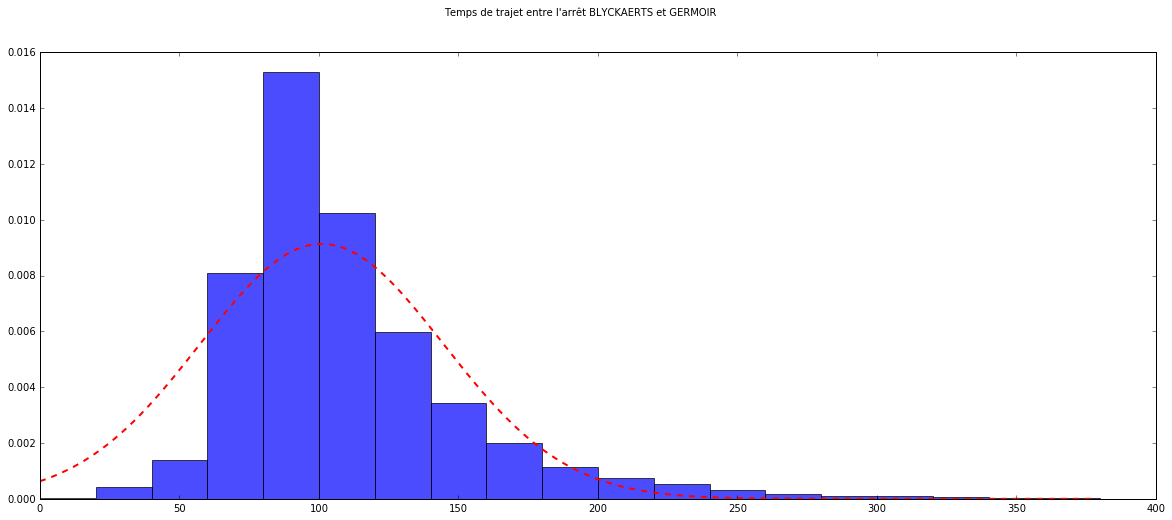

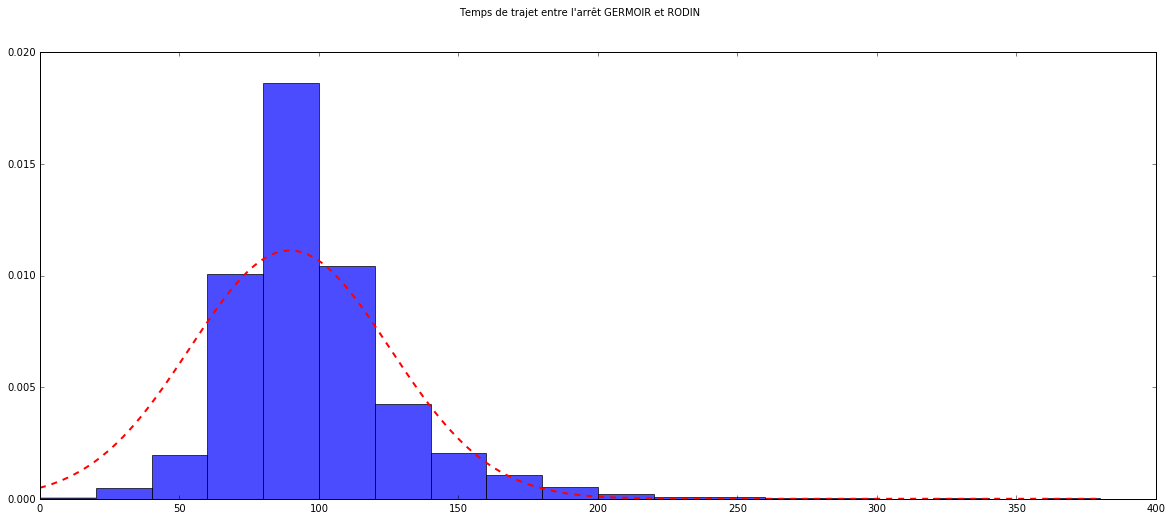

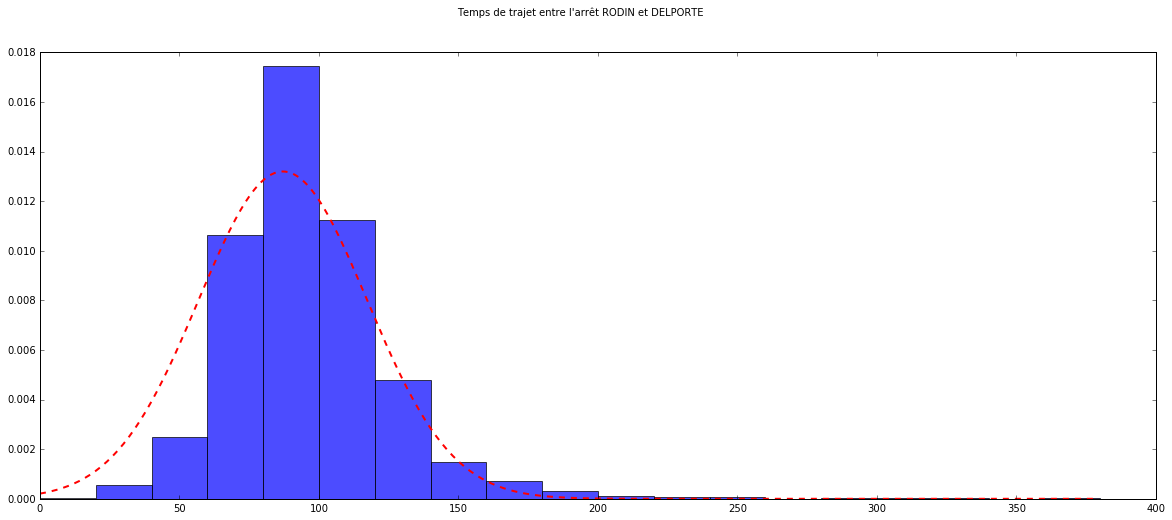

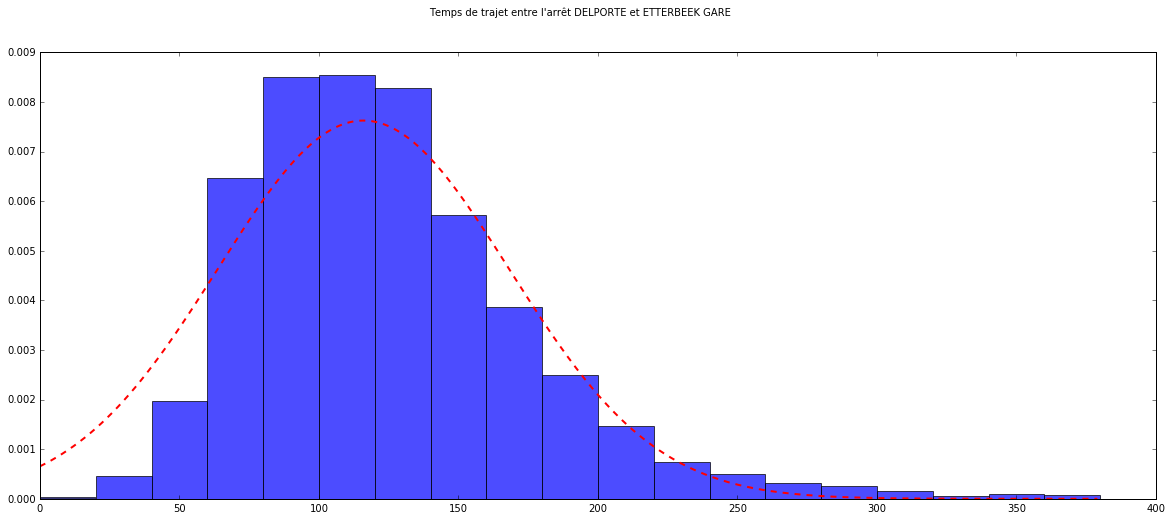

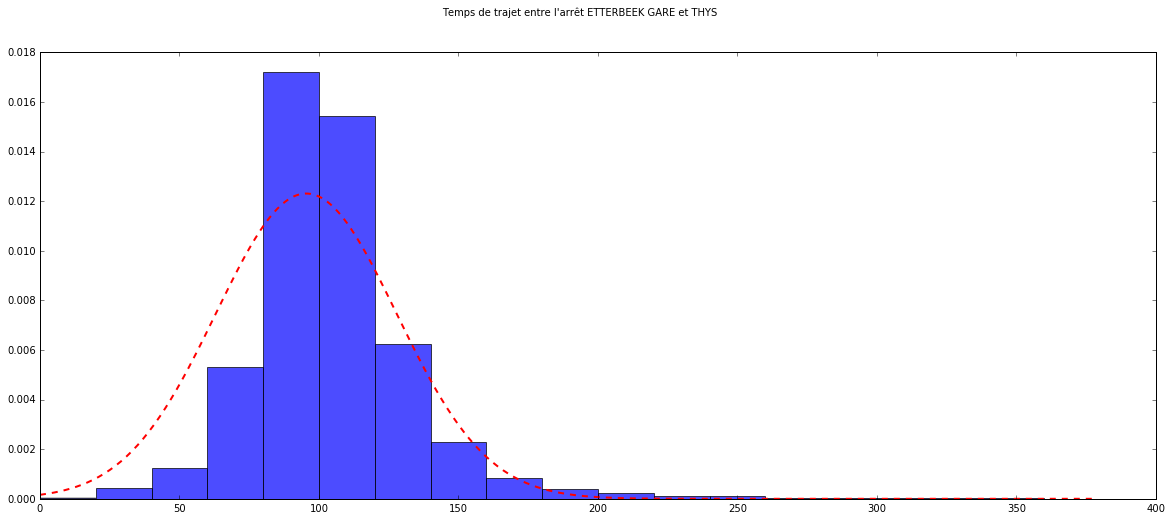

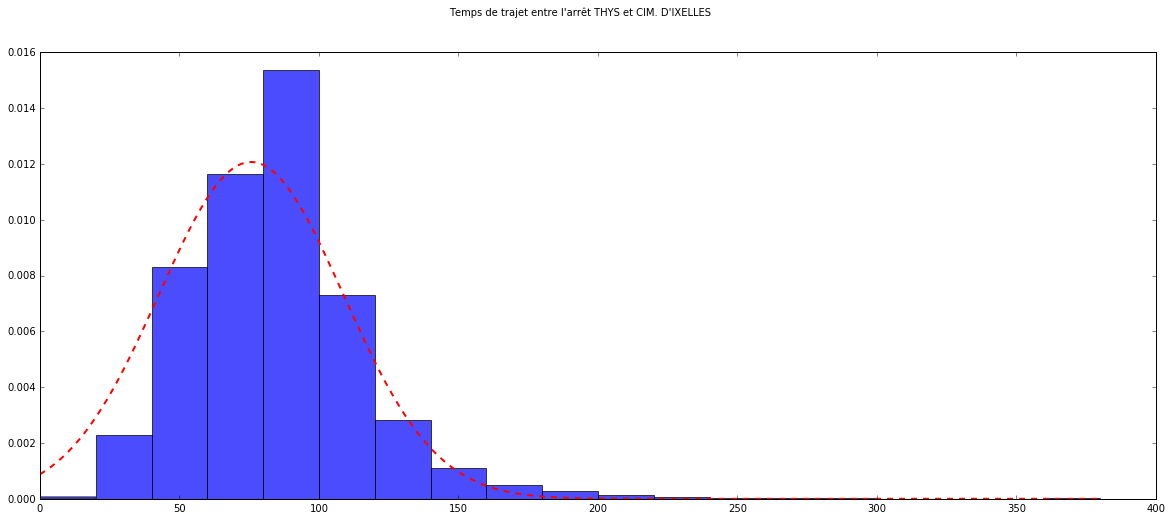

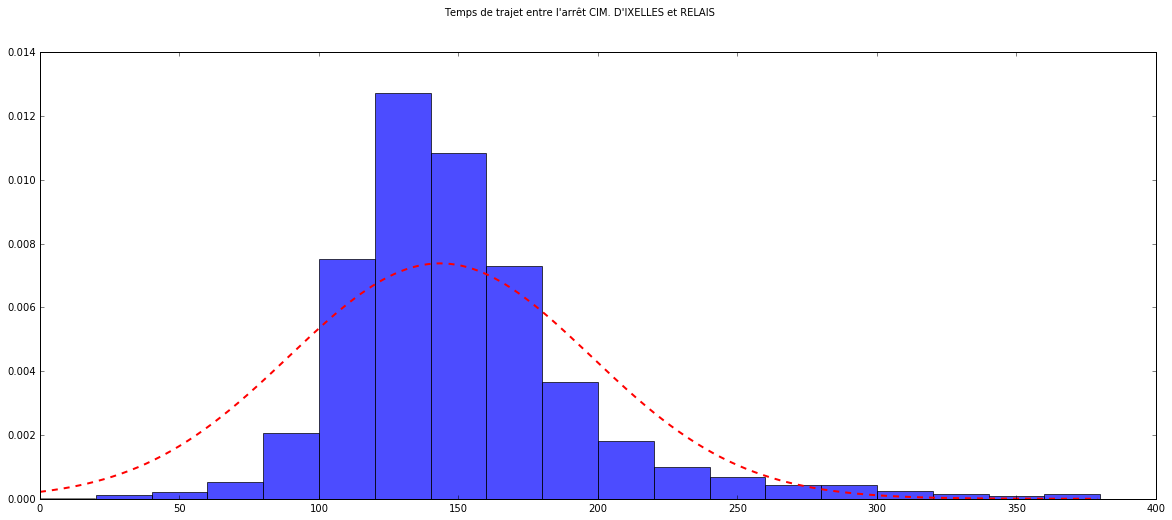

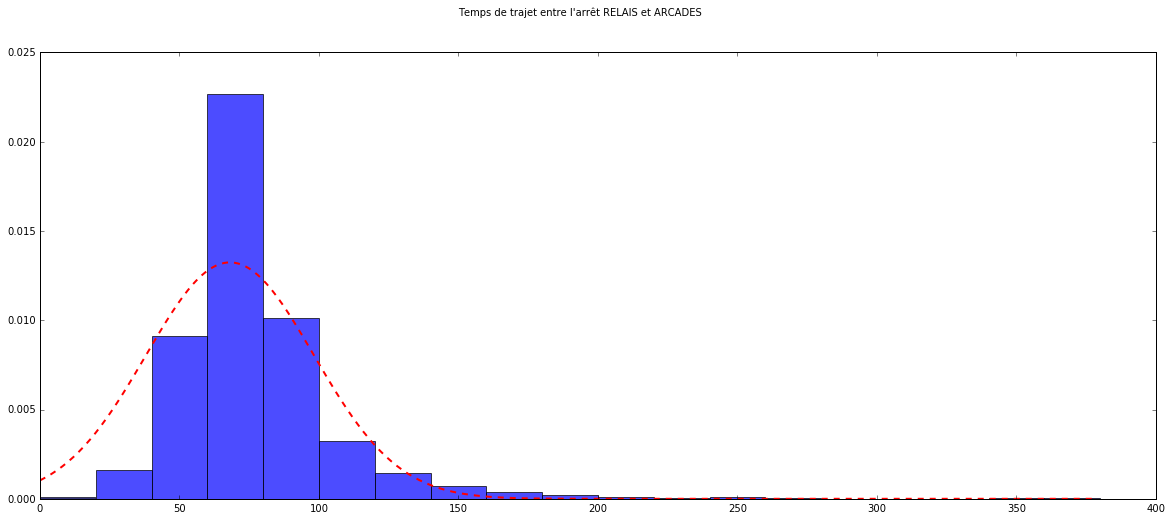

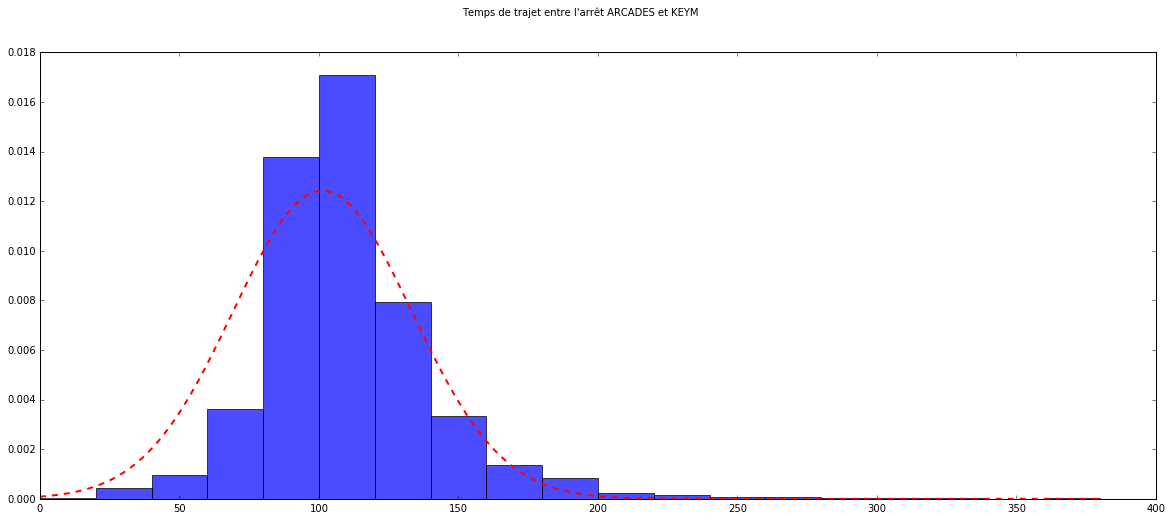

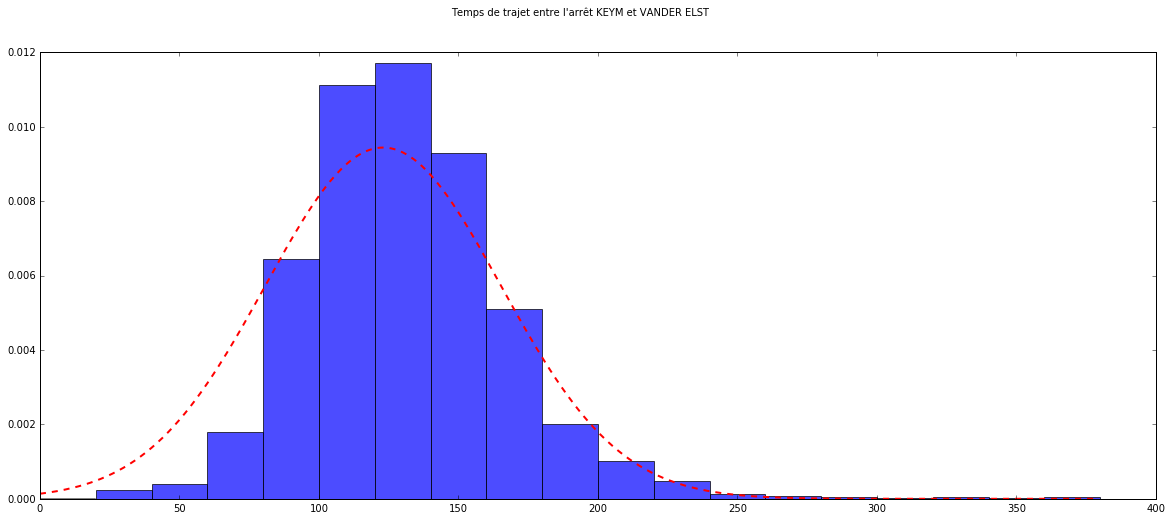

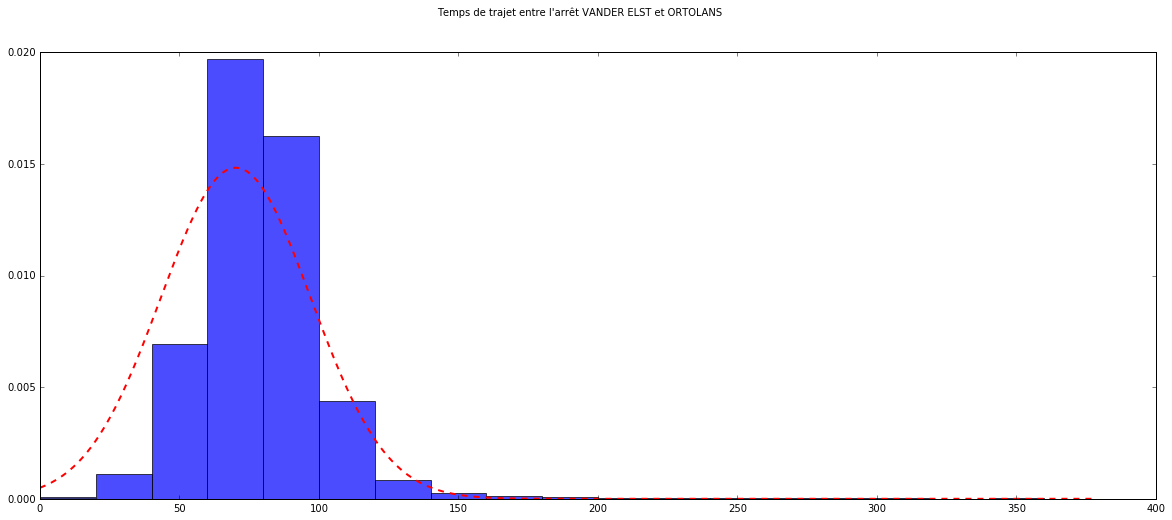

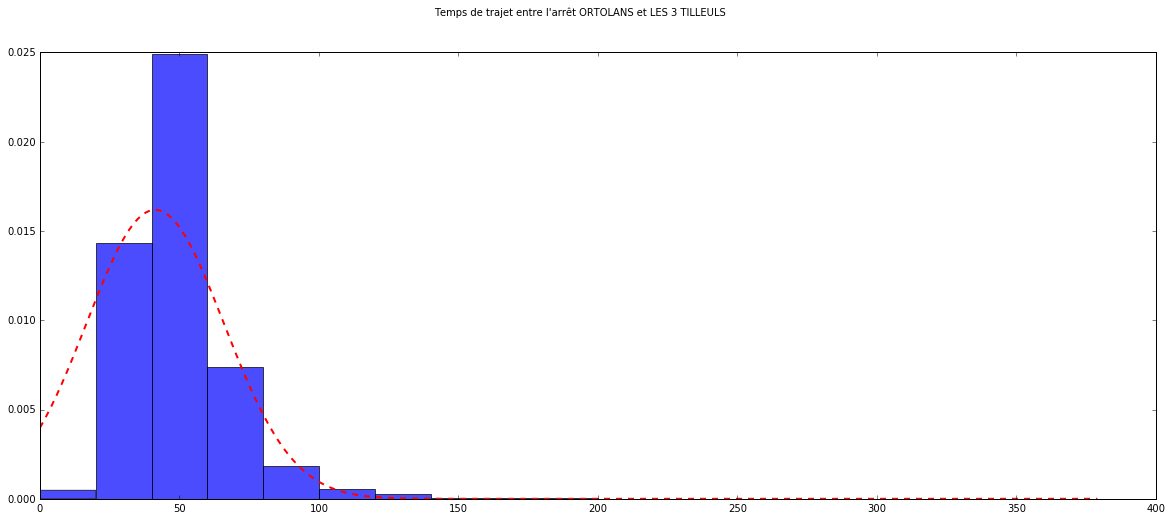

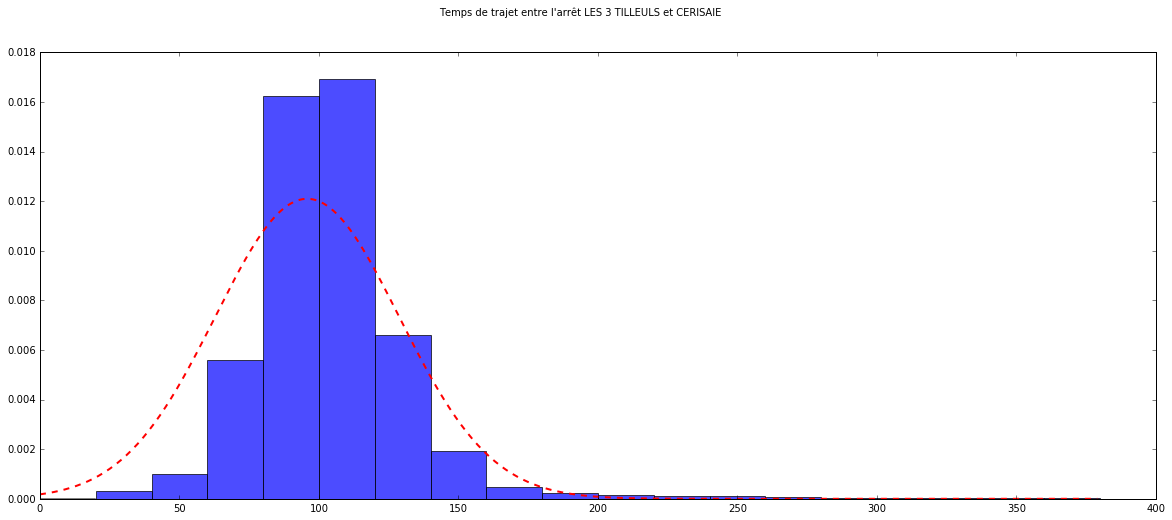

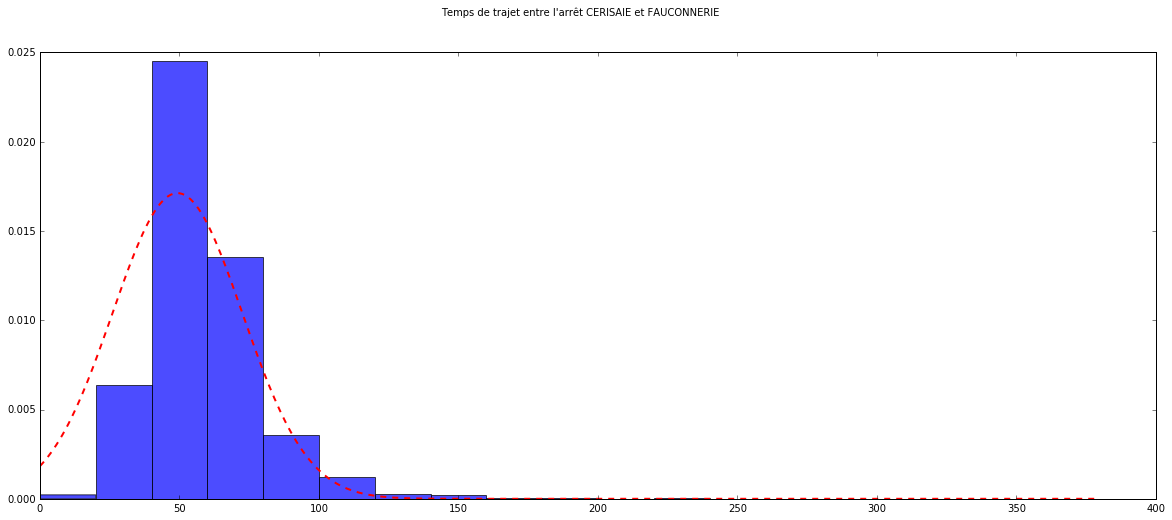

In [53]:
for stop, times in enumerate(travel_times):
    mu = statistics.mean(times)
    sigma = statistics.stdev(times)
    n, bins, patches = plt.hist(times, bins=range(0,400, 20), alpha=0.7, normed=True);

    bins = array(range(0, max(bins)))
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--', linewidth=2)
    plt.suptitle("Temps de trajet entre l'arrêt {} et {}".format(stops_names[stop], stops_names[stop+1]))
    plt.show()

# Machine learning

## Méthode expérimentale
Séparons le dataset en 3 morceaux : 60-20-20%
Les premiers 60% serviront à entrainer l'algorithme, le 20% à choisir l'hyperparamètre et les 20% restants à valider la performance de la prédiction

## Prédiction à faire
Nous cherchons pour l'instant à prédire le temps qu'il faudra au bus pour parcourrir les 3 prochains arrêts.

## Fonction à minimiser
Ce que nous chercherons à minimiser est le RMSE (la moyene de l'erreur absolue) de la prédiction

In [ ]:
# Séparation du dataset:

